This python script will be used to get the regulons from the upstream pyscenic script and then score the cells in our dataset with AUCell.

In [1]:
%matplotlib inline
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import loompy as lp
import glob
import os

/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


We use the h5ad file created from sceasy to bring our Seurat object into the python environment.

In [2]:
parent_dir = "/Volumes/SanDiskSSD/bar-or_lab/projects/tonsil_project/analysis/sct_seurat/"

In [3]:
Bint = sc.read_h5ad(parent_dir + "sct_named_clusters.h5ad")

In [4]:
Bint

AnnData object with n_obs × n_vars = 45376 × 17829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.dissoc', 'percent.mt', 'donor', 'nCount_SCT', 'nFeature_SCT', 'S.Score', 'G2M.Score', 'Phase', 'LZ.Score1', 'DZ.Score1', 'MYC.signature1', 'dissoc.signature1', 'CD40.signalling1', 'BCR_stim1', 'CD40_stim2', 'annoy_nn_snn_res.0.5', 'annoy_nn_snn_res.0.6', 'annoy_nn_snn_res.0.7', 'annoy_nn_snn_res.0.8', 'annoy_nn_snn_res.0.9', 'annoy_nn_snn_res.1', 'annoy_nn_snn_res.1.1', 'annoy_nn_snn_res.1.2', 'annoy_nn_snn_res.1.3', 'seurat_clusters', 'new_clusters_nums', 'cluster_names'
    var: 'highly_variable'
    obsm: 'X_pca', 'X_pca_umap'
    layers: 'data'

In [5]:
# Here we load the regulons from upstream pyscenic pipeline

In [6]:
regulons_1 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_1.csv")
regulons_2 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_2.csv")
regulons_3 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_3.csv")
regulons_4 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_4.csv")
regulons_5 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_5.csv")
regulons_6 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_6.csv")
regulons_7 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_7.csv")
regulons_8 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_8.csv")
regulons_9 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_9.csv")
regulons_10 = pd.read_csv(parent_dir + "/from_pyscenic_HPC/w_filter/run_compiled/Bint_pyscenic_regulons_formatted_run_10.csv")

In [7]:
dfs = [df.set_index(['TF', 'Targets']) for df in [regulons_1, regulons_2, regulons_3, regulons_4, regulons_5,\
                                                  regulons_6, regulons_7, regulons_8, regulons_9, regulons_10]]
for df in dfs:
    df["incidence"] = 1

reg_full_df = pd.concat(dfs, axis=1, join="outer").reset_index()
occurences = reg_full_df.iloc[:,2:13].sum(axis = 1)
reg_full_df = reg_full_df.iloc[:,0:2]
reg_full_df["occurences"] = occurences

In [8]:
reg_full_df

,TF,Targets,occurences
0,ADNP2,AHI1,3.0
1,ADNP2,CAMKK2,3.0
2,ADNP2,DCAF6,3.0
3,ADNP2,GALNT14,3.0
4,ADNP2,NCOA7,3.0
...,...,...,...
187672,ZXDC,MAP3K1,2.0
187673,ZXDC,PLEC,3.0
187674,ZXDC,SPG7,3.0
187675,ZXDC,TCF20,1.0


<BarContainer object of 10 artists>

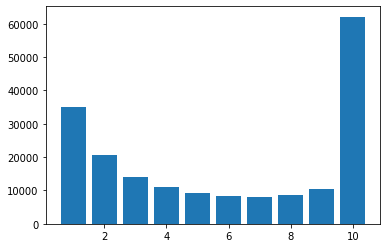

In [9]:
import matplotlib.pyplot as plt
x, y = np.unique(reg_full_df["occurences"], return_counts=True)
plt.bar(x = x, height = y)

In [10]:
reg_full_df_inner = reg_full_df.loc[reg_full_df["occurences"] == 10,:]
reg_full_df_inner = reg_full_df_inner[["TF", "Targets"]]
reg_full_df_inner

,TF,Targets
49,ARID3A,AHNAK
54,ARID3A,ARID3A
68,ARID3A,CLDN14
99,ARID3A,LMNA
135,ARID3A,TCF4
...,...,...
187087,ZNF76,ZNF780B
187664,ZXDB,GPRC5C
187666,ZXDB,PIK3CD
187667,ZXDB,RNF2


In [11]:
np.sum(reg_full_df_inner["TF"]=="NR1H2")

0

In [12]:
reg_full_df_inner.to_csv(parent_dir + "/aucell/Bint_pyscenic_regulons_merged.csv", index=False)

In [13]:
Bint_counts = pd.DataFrame(Bint.X.toarray().T, index = Bint.var.index, columns = Bint.obs.index)

In [14]:
Bint_counts

,TC124.1_AAACCTGAGAAACGCC,TC124.1_AAACCTGAGCACGCCT,TC124.1_AAACCTGAGCCACCTG,TC124.1_AAACCTGAGCTTATCG,TC124.1_AAACCTGAGTACATGA,TC124.1_AAACCTGCACACAGAG,TC124.1_AAACCTGCACGAAAGC,TC124.1_AAACCTGCACGCCAGT,TC124.1_AAACCTGCAGCATGAG,TC124.1_AAACCTGCAGGTTTCA,...,TC126_TTTGTCAGTAGCTTGT,TC126_TTTGTCAGTAGGGTAC,TC126_TTTGTCAGTCCTAGCG,TC126_TTTGTCAGTCGCATCG,TC126_TTTGTCAGTGACTACT,TC126_TTTGTCAGTGCTTCTC,TC126_TTTGTCAGTTAAGACA,TC126_TTTGTCATCAAAGACA,TC126_TTTGTCATCAGCACAT,TC126_TTTGTCATCTGAGTGT
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL669831.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FAM41C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NOC2L,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RIPK4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UBASH3A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FTCD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AP001469.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#write FULL Bint_counts to loom
row_attrs = {
    "Gene": np.array(Bint_counts.index) ,
}
col_attrs = {
    "CellID": np.array(Bint_counts.columns)
}
lp.create(parent_dir + "/aucell/Bint_pyscenic_full.loom", Bint_counts.values, row_attrs, col_attrs)

In [16]:
gene_separator = ","
field_separator = ","
with open(parent_dir + "/aucell/Bint_pyscenic_regulons_merged.gmt", "wt") as file:
    for k, g in reg_full_df_inner.groupby(by = "TF"):
        genes = gene_separator.join(g.Targets)
        regulon_name = k + "_regulon"
        file.write("{}{}{}{}{}\n".format(regulon_name,",","custom",",", genes))

In [17]:
!pyscenic aucell \
    {parent_dir + "/aucell/Bint_pyscenic_full.loom"} \
    {parent_dir + "/aucell/Bint_pyscenic_regulons_merged.gmt"} \
    --output {parent_dir + "/aucell/Bint_pyscenic_regulons_auc.csv"} \
    --num_workers 4

/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm

2020-12-12 01:28:52,112 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2020-12-12 01:28:59,206 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.

2020-12-12 01:28:59,220 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.
/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for 

In [18]:
auc_mtx = pd.read_csv(parent_dir + "/aucell/Bint_pyscenic_regulons_auc.csv", index_col=0)

In [19]:
auc_mtx

,ARID3A_regulon,ATF1_regulon,ATF2_regulon,ATF3_regulon,ATF4_regulon,ATF5_regulon,ATF6_regulon,ATF6B_regulon,BACH1_regulon,BACH2_regulon,...,ZBTB33_regulon,ZBTB7A_regulon,ZNF134_regulon,ZNF136_regulon,ZNF143_regulon,ZNF235_regulon,ZNF274_regulon,ZNF425_regulon,ZNF76_regulon,ZXDB_regulon
Cell,,,,,,,,,,,,,,,,,,,,,
TC124.1_AAACCTGAGAAACGCC,0.000000,0.082161,0.0,0.055309,0.085304,0.091019,0.050964,0.054463,0.036517,0.203816,...,0.364826,0.0,0.022671,0.00000,0.023516,0.000000,0.075180,0.000000,0.005996,0.179293
TC124.1_AAACCTGAGCACGCCT,0.145006,0.087365,0.0,0.040518,0.087129,0.121568,0.053375,0.054345,0.014558,0.000000,...,0.350550,0.0,0.030976,0.00000,0.023304,0.000000,0.074734,0.000000,0.012981,0.000000
TC124.1_AAACCTGAGCCACCTG,0.123457,0.091923,0.0,0.042788,0.077231,0.074786,0.055270,0.049383,0.027847,0.000000,...,0.324804,0.0,0.000000,0.00000,0.025014,0.378601,0.064270,0.000000,0.012283,0.000000
TC124.1_AAACCTGAGCTTATCG,0.000000,0.121323,0.0,0.060104,0.104830,0.087816,0.053889,0.051509,0.032710,0.000000,...,0.357149,0.0,0.088889,0.00000,0.008325,0.000000,0.041609,0.000000,0.010038,0.000000
TC124.1_AAACCTGAGTACATGA,0.000000,0.081346,0.0,0.039732,0.088789,0.139826,0.060155,0.051273,0.068593,0.000000,...,0.351134,0.0,0.000000,0.00000,0.018457,0.000000,0.048458,0.000000,0.009677,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TC126_TTTGTCAGTGCTTCTC,0.000000,0.070379,0.0,0.053060,0.107902,0.089705,0.062142,0.056885,0.042811,0.000000,...,0.313176,0.0,0.135802,0.00000,0.037311,0.000000,0.043722,0.000000,0.014049,0.000000
TC126_TTTGTCAGTTAAGACA,0.000000,0.091789,0.0,0.031757,0.081786,0.105554,0.054910,0.051214,0.062786,0.000000,...,0.348328,0.0,0.000000,0.03353,0.014948,0.000000,0.061464,0.000000,0.025162,0.000000
TC126_TTTGTCATCAAAGACA,0.000000,0.074698,0.0,0.032923,0.099455,0.098930,0.050723,0.055644,0.065502,0.000000,...,0.350213,0.0,0.025814,0.00000,0.030162,0.000000,0.061068,0.064454,0.020029,0.000000


In [20]:
!pyscenic aucell \
    {parent_dir + "/aucell/Bint_pyscenic_full.loom"} \
    {parent_dir + "/aucell/genesets.gmt"} \
    --output {parent_dir + "/aucell/Bint_genesets_auc.csv"} \
    --num_workers 4

/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm

2020-12-12 01:32:29,483 - pyscenic.cli.pyscenic - INFO - Loading expression matrix.

2020-12-12 01:32:37,226 - pyscenic.cli.pyscenic - INFO - Loading gene signatures.

2020-12-12 01:32:37,236 - pyscenic.cli.pyscenic - INFO - Calculating cellular enrichment.
/Users/diegoespinoza/miniconda3/lib/python3.8/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for 